<a href="https://colab.research.google.com/github/waliamehak/predictiveAnalysisOfCandies/blob/main/Predictive_Analysis_of_candies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mehak Jeet Singh Walia

#**Determine a Proper Model** 
**Mission-** I will look at the ingredients of a candy and its win percentage, and then predict if a new candy would be a hit or not based on its ingredients.  
So, in our case we want to perform a predictive analysis. So based on multiple features, we want to determine one single attribute. That is, success of a candy (winpercent) is based on the ingredients of that particular candy and also loosely based on the price of that candy.  
At first, I thought I will perform a multiple linear regression on the model but that did not turn out too well for me. The reason behind this was the data is in binary form. Upon some research, I found there is all together different form of regression present for such scenario.  
As what I want to determine is of dichotomous nature (successful or unsuccessful) and is dependent on one or more variables, logistic regression would be the suitable fit to create our model.


#**Obtaining, scrubbing and formatting data**


In [ ]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
uploaded=files.upload()

Saving candy-data.csv to candy-data.csv


In [ ]:
uploaded

{'candy-data.csv': b'competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent\n100 Grand,1,0,1,0,0,1,0,1,0,.73199999,.86000001,66.971725\n3 Musketeers,1,0,0,0,1,0,0,1,0,.60399997,.51099998,67.602936\nOne dime,0,0,0,0,0,0,0,0,0,.011,.116,32.261086\nOne quarter,0,0,0,0,0,0,0,0,0,.011,.51099998,46.116505\nAir Heads,0,1,0,0,0,0,0,0,0,.90600002,.51099998,52.341465\nAlmond Joy,1,0,0,1,0,0,0,1,0,.465,.76700002,50.347546\nBaby Ruth,1,0,1,1,1,0,0,1,0,.60399997,.76700002,56.914547\nBoston Baked Beans,0,0,0,1,0,0,0,0,1,.31299999,.51099998,23.417824\nCandy Corn,0,0,0,0,0,0,0,0,1,.90600002,.32499999,38.010963\nCaramel Apple Pops,0,1,1,0,0,0,0,0,0,.60399997,.32499999,34.517681\nCharleston Chew,1,0,0,0,1,0,0,1,0,.60399997,.51099998,38.975037\nChewey Lemonhead Fruit Mix,0,1,0,0,0,0,0,0,1,.73199999,.51099998,36.017628\nChiclets,0,1,0,0,0,0,0,0,1,.046,.32499999,24.524988\nDots,0,1,0,0,0,0,0,0,1,.73199999,.51099998,42.272076\nDu

In [ ]:
candyData=pd.read_csv(io.StringIO(uploaded['candy-data.csv'].decode('utf-8'))) # Load the CSV files into dataframe

In [ ]:
candyData

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [ ]:
candyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


#**Applying the algorithm**

In [ ]:
corr_matrix = candyData.corr()

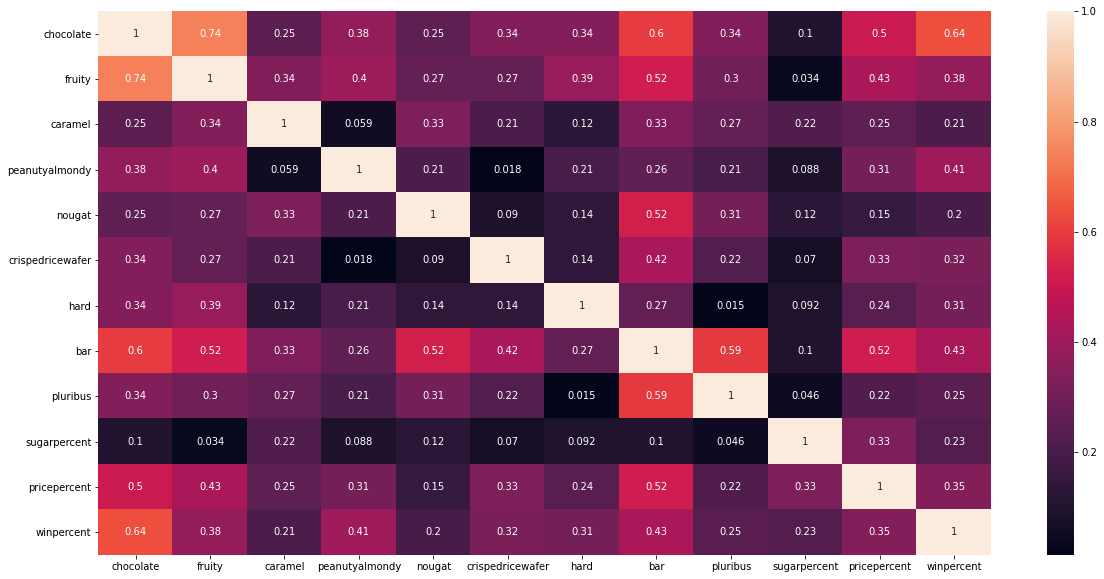

In [ ]:
plt.figure(figsize=(20,10)) # setting the plot size
sns.heatmap(corr_matrix.abs(),annot=True)

In [ ]:
candyData["WIN"] = ""
for i in range(len(candyData)):
    if candyData.loc[i,"winpercent"] <= 60:
        candyData.loc[i,"WIN"] = 0
    else:
        candyData.loc[i,"WIN"] = 1

I have written this manual piece of code to add a new column in the dataframe by the name of "WIN". It is of binary nature. The threshold for a candy to be categorised as successful has been set to 80% here. If the winpercent of the candy is less than 70  percent it is deemed as a failure. Success is represented as '1' and failure is '0'.  
Bingo now we are ready to train and test our model. But there is a slight modification to the data that we need to do before continuing.  

In [ ]:
candyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
 13  WIN               85 non-null     object 
dtypes: float64(3), int64(9), object(2)
memory usage: 9.4+ KB


If we see the datatype of the newly created "WIN" column it is of object nature. We cannot perform logistic regression on such datatype. The only permitted datatypes are 'binary', 'multiclass', 'multiclass-multioutput',
 'multilabel-indicator' and 'multilabel-sequences'.  
 So, we need to convert this datatype into one of the acceptable datatypes.
 I converted it into integer datatype. 0's and 1's make the column as a binary  column.


In [ ]:
candyData.WIN=candyData.WIN.astype(int)

In [ ]:
candyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
 13  WIN               85 non-null     int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 9.4+ KB


 Bingo, we are now good to go!

In [ ]:
feature_cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent', 'pricepercent']
X = candyData[feature_cols] # Features
y = candyData.WIN # Target variable

Here, I am considering all the columns as my features to deterine the succcess of a candy. If we want, we could remove the last three features from the feature_cols to solely base the success of a candy on its ingredients.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

train_test_split is a powerful library which splits the data into testing and training data in just a single line. Here, the training data accounts for the 75% of our data set and the rest is the data we test our model on to predict the accuracy of our model.

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

Here, we fit our model with our training data. That is, the values of X_train and how it affects y_train is understood by our model and then we make the predictions to our model by passing it the X_test and storing the results in y_pred. \
Now, we would want to see how our model performed! \
So we would want to compare the values of y_test and y_train and see how our model performed!

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[17,  1],
       [ 3,  1]])

The confusion matrix, as the name suggests, is a matrix that is popluarly used to describe the performance of logistic regression model on a set of test data for which the true values are known.  
Here '17' and '1' are the desired values (along the principle diagonal) or right predictions and '1' and '3' are the wrong predictions. These are essentially true positives, true negatives, false positives and false negatives. So we want true positives and false negatives for the indexes 00, 01, 10, and 11 of the matrix respectively.

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.8620689655172413
Root Mean Squared Error: 0.8137139067635417


#**Visualize**

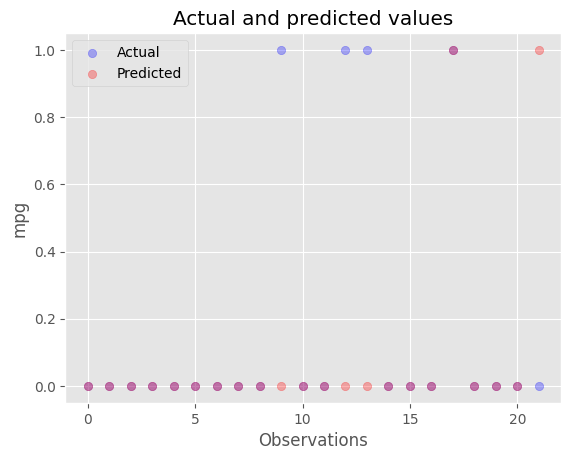

In [ ]:
import matplotlib.pyplot as plt
_, axes = plt.subplots()

axes.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
axes.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

Here, I have used the most commonly used graph when it comes to logistic regression. The graph is pretty much self-explanatory. If the actual and predicted values are the same, then we have a magenta/ purple dot (red+blue) (p.s. I am not good with colours and thier names)  
I see in the graph, our model predicted 4 of the values wrongly.

#**Discussion**

I believe that we have a fairly solid model here with a fairly decent accuracy and root mean squared value. This shall be able to predict the success of a candy correctly for most of the time.  
I believe the only point at which the model is lagging is the size of the dataset. It is a fairly small dataset, so our model did not have ample training data to train on. The model could turn out to be a lot more accurate and robust should we have a bigger dataset for our model to train on.  
Let us make a fictional case to test our model on! 
We could add some fictional rows to the our X_test and y_test. X_test has a lot of features, and to carefully select the right values to successfully write down the accurate winpercent of that candy is very complex. I would not know if my model has predicted correctly as I dont know the correct result to begin with so I did not.  
 But I can explain the process that I thought of. The process itself is very simple. We do not re-train the existing model. We append a row (the values for the ingredients) to X_test and the corresponding correct result (winpercent) to the y_test. Then, pass X_test again to our model and then see the results (y_pred). Then we can print the y_pred series to observe if the model has correctly predicted the results or not.

#**Summary**
**Mission**- I will look at the ingredients of a candy and its win percentage, and then predict if a new candy would be a hit or not based on its ingredients.  
**Results**- I think my model has performed decently well. As said earlier, the size of the dataset in itself is not sufficient for me to speak so confidently about the perfomance of my model created. But as for the given data, it has given an excellent performance.  
**Improvements**- Honestly, I do not know if any other model would have had performed better than this one. Multiple linear regression was not giving me the desired results, I was getting a lot of false positives./
I could think of using classification algorithms here, to divide the results into two classes- successful and unsuccessful. But I cannot say if this would improve on the results or not. The only way to know for sure is to try and see for our selves.  
**Conclusion**- The linear and multiple linear regression had been already discussed in the class so I wanted to do something new. I faced alot of errors and had to do alot of brainstorming to complete the task at hand. I learnt alot about linear multiple regression (although I didnot apply it, the knowledge never goes in vain) and logistic regression and where to use which visualisation technique.

#**References**
1.  Kaggle.com. 2020. The Ultimate Halloween Candy Power Ranking. [online] Available at: <https://www.kaggle.com/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/> [Accessed 16 December 2020]. 
2.  Bartosz Mikulski. 2020. How To Visualise Prediction Errors. [online] Available at: <https://www.mikulskibartosz.name/how-to-visualise-prediction-errors/> [Accessed 16 December 2020].
3. Pandas.pydata.org. 2020. Pandas.Series.Append — Pandas 1.1.5 Documentation. [online] Available at: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.append.html> [Accessed 16 December 2020].